# **INTRODUCCIÓN**

In [17]:
### para exportar pdf sin celdas de codigo, ejecutar en el cmd del sistema:

## cd C:\Users\User\Desktop\PROYECTO COMPU 1

### python -m jupyter nbconvert --to pdf --no-input jupyter.ipynb

En este informe se busca realizar el estudio de la relación que existe entre el nivel educativo parental de los estudiantes y la preparación previa que estos poseen antes de un examen. Para ello, se analizarán las estadísticas descriptivas de cada una de las variables y posteriormente se medirá la fuerza de relación de estas variables (mediante visualización de tablas y gráficos) para observar que tan fuerte es esta correlación. Además, como la categoria "Algun estudio de secundaria" de la variable "Nivel educativo de los padres" se considera como valor atipico porque no sigue el comportamiento esperado, se analiza bidimensionalmente con la variable "sexo", donde se determina si el sexo del estudiantr puede influir en esta categoria sobre si los estudiantes tienden más a completar o no la preparacion previa al examen.

# **Primeras 5 filas de la base de datos:**

In [18]:
#leer la base de datos en formato csv 
import pandas as pd

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_

csv = ('https://raw.githubusercontent.com/Rickfer14/StudentsPerformance-G5-G6-Grupo-5/refs/heads/main/Rendi'
'miento%20de%20los%20estudiantes%20de%205to%20y%206to%20grado.csv')
df = pd.read_csv(csv)

#modificación de la BBDD para mejor legibilidad
df = df.drop(columns=['Raza',  'Nota', 'Almuerzo', 'Promedio'])
df = df.rename(columns={'Nota en matemáticas':'Matemática', 
                        'Nota en lectura':'Lectura', 
                        'Nota en escritura':'Escritura'})
#mostrar primeras 5 filas del csv
df.head(5)

,Género,Nivel educativo de los padres,Preparación,Matemática,Lectura,Escritura
0,Femenino,Licenciatura,Ninguna,72,72,74
1,Femenino,Algun estudio universitario,Completada,69,90,88
2,Femenino,Título de maestría,Ninguna,90,95,93
3,Masculino,Título de asociado,Ninguna,47,57,44
4,Masculino,Algun estudio universitario,Ninguna,76,78,75


# **Distribución de las categorías de preparación para exámenes (Completada/Ninguna) entre los diferentes niveles educativos parentales.**

En la siguiente tabla, se muestran la cantidad de estudiantes que completaron (o no) la preparación previa al examen, según el nivel educativo de los padres de los estudiantes.

- Cómo análisis general, se puede observar que los estudiantes tienden más a no completar el curso que si hacerlo. Concretamente, 64,2% de los estudiantes son quienes no completan el curso.

- La clase más frecuente, respecto a los estudiantes que completaron el curso, es la categoría "Título de asociado", representando a 82 de los 358 estudiantes pertenecientes a este nivel educativo parental.

- Si bien, los estudiantes de la categoría "Título de maestría" son quienes menos tienen esta preparación completada, puede deberse a la poca cantidad de estudiantes que poseen padres en esta categoría, siendo esta la menos frecuente con solo 59 estudiantes.

In [19]:
tabla = pd.crosstab(df['Nivel educativo de los padres'], 
        df['Preparación'],
         margins=False,
         margins_name='Total'
)

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_

tabla


Preparación,Completada,Ninguna
Nivel educativo de los padres,,
Algun estudio de secundaria,77,102
Algun estudio universitario,77,149
Escuela secundaria,56,140
Licenciatura,46,72
Título de asociado,82,140
Título de maestría,20,39


- Sin embargo, para una mejor interpretación y visualización de los datos, se presenta el siguiente gráfico de barras:

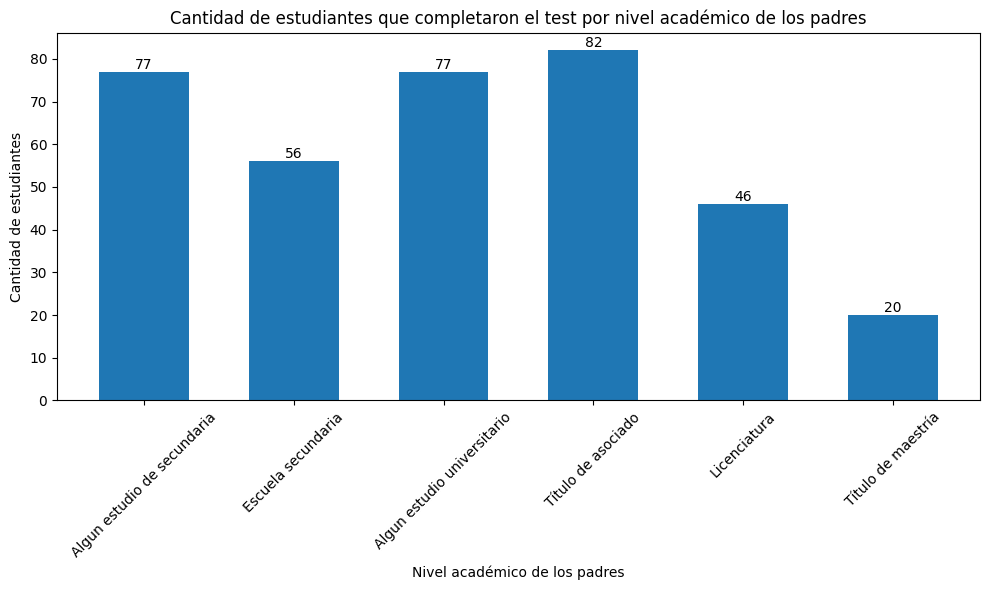

In [20]:
#filtrar a los estudiantes que solo hayan completado la preparacion
filtro_curso = df[df['Preparación'] == 'Completada']

#separar en grupos a los estudiantes hayan completado la preparacion
# por el nivel educativo de los padres 
filtro_curso1 = filtro_curso.groupby('Nivel educativo de los padres').size()

#niveles educativos ordenados
filtro_curso1_ordenado = filtro_curso1.reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])
etiquetas = filtro_curso1_ordenado.index
valores = filtro_curso1_ordenado.values

# --crear grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
grafico = plt.bar(etiquetas, valores,width=0.6)
plt.bar_label(grafico, labels=valores)

# Añadir etiquetas y título
plt.title('Cantidad de estudiantes que completaron el '
           'test por nivel académico de los padres')
plt.xlabel('Nivel académico de los padres')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)

#Mostrar el grafico
plt.tight_layout()
plt.show()

Se observan las frecuencias de los estudiantes que completaron el curso según el nivel académico de los padres. Ademas, el porcentaje de estudiantes que lo completaron, por nivel academico parental es el siguiente:



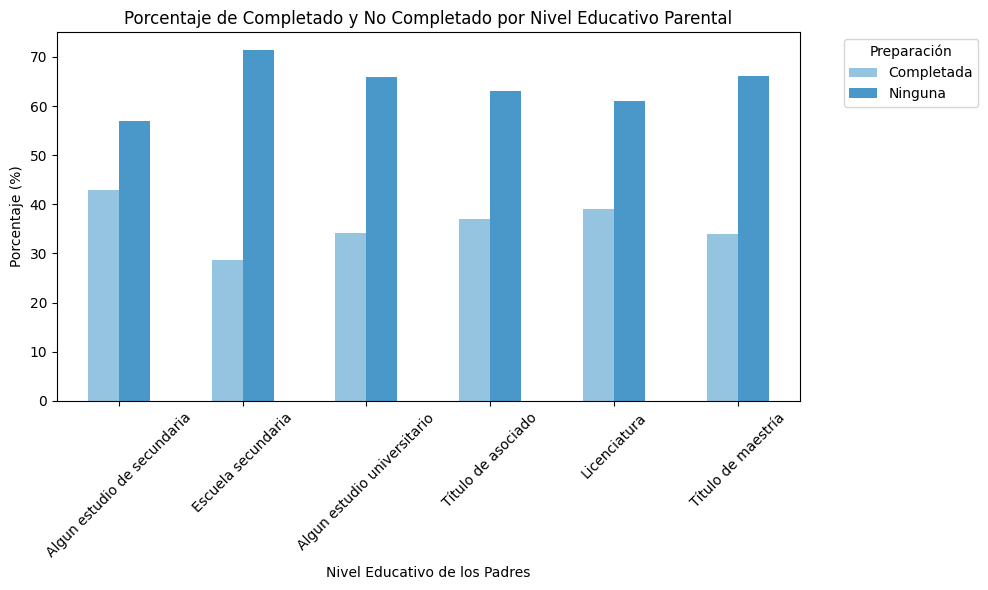

In [21]:
#Tabla con porcentajes
tabla_porcentajes = tabla.div(tabla.sum(axis=1), axis=0) * 100
tabla_porcentajes = tabla_porcentajes.reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])
#Crear grafico
colors = plt.cm.Blues([0.4, 0.6])
tabla_porcentajes.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Añadir etiquetas y título
plt.title('Porcentaje de Completado y No Completado por Nivel Educativo Parental')
plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Con los datos extraidos de la siguiente tabla:

In [22]:
tabla_porcentajes_redondeado = tabla_porcentajes.round(2).reindex([
    "Algun estudio de secundaria",
    "Escuela secundaria",
    "Algun estudio universitario",
    "Título de asociado",
    "Licenciatura",
    "Título de maestría",
])

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_ 

tabla_porcentajes_redondeado = tabla_porcentajes_redondeado.astype(str)
tabla_porcentajes_redondeado


Preparación,Completada,Ninguna
Nivel educativo de los padres,,
Algun estudio de secundaria,43.02,56.98
Escuela secundaria,28.57,71.43
Algun estudio universitario,34.07,65.93
Título de asociado,36.94,63.06
Licenciatura,38.98,61.02
Título de maestría,33.9,66.1


Viendo esto, se puede apreciar que, por ejemplo, los estudiantes con padres de educación escuela secundaria completan la preparación aproximadamente un 28.57%, contra los estudiantes con padres con titulo de maestría, que lo completan, en promedio, 33.89% de los estudiantes. Esto sirve para visualizar de mejor manera la proporción con la que cada clase tiende a completar la preparación previa, ya que los números crudos podrian parecer engañosos.

## *Una visualización diferente de los mismos datos, utilizando un pointplot, o gráfico de puntos:*

- Se aprecia la extensión de los datos, junto con la proporción de realizar la preparación previa por cada nivel de educación parental.

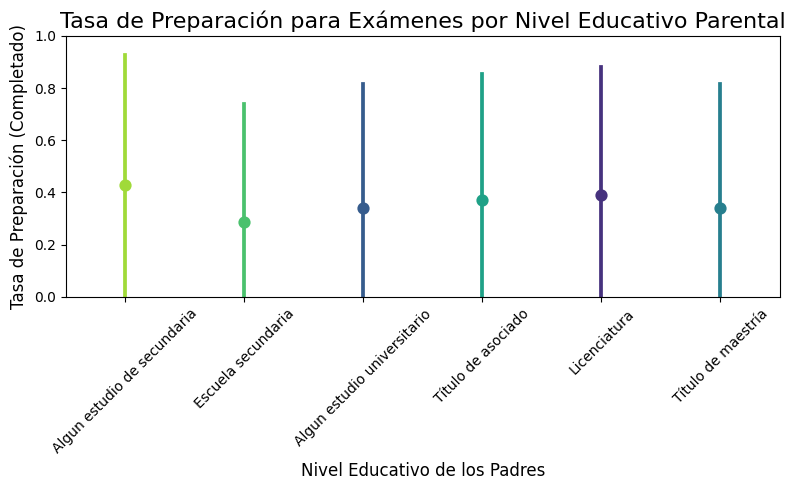

In [23]:
import seaborn as sns

# Crear el gráfico de puntos

orden_jerarquico = [
    'Algun estudio de secundaria',
    'Escuela secundaria',
    'Algun estudio universitario',
    'Título de asociado',
    'Licenciatura',
    'Título de maestría',
]

df['Preparación_binaria'] = df['Preparación'].map({'Completada': 1, 'Ninguna': 0})
plt.figure(figsize=(8, 5))
sns.pointplot(
    x='Nivel educativo de los padres',
    y='Preparación_binaria',
    hue='Nivel educativo de los padres',
    data=df,
    order=orden_jerarquico,
    palette='viridis',
    errorbar='sd',
    legend=False
)

# Añadir etiquetas y título
plt.title('Tasa de Preparación para Exámenes por Nivel Educativo Parental', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=12)
plt.ylabel('Tasa de Preparación (Completado)', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# **Preparación previa y su influencia en las notas de los estudiantes, según el nivel educativo parental**

Se pueden observar en los siguientes gráficos las distintas categorias de los niveles educativos parentales, con dos subcategorías (Preparación: Completada ó Ninguna), donde se visualiza como esto afecta a las notas de cada una de las asignaturas: Matemáticas, lectura y escritura. 

- Analizando las distribuciones se observa que, en efecto, aquellos estudiantes que completan la preparación se encuentran en un rango de notas por encima de aquellos que no la completan.

- Mediante el patrón de las cajas de la preparación completada, se puede visualizar la tendencia a encontrarse un poco más arriba respecto a las notas, según el nivel educativo parental es más alto. Esto indica que los estudiantes con padres de mayor nivel parental, además de tender a realizar, en promedio, más preparaciones previas, tambien aumentan las notas de los mismos.

- Esto se refuerza observando los bigotes de las cajas, donde a menor nivel educativo parental, tiende más a haber mayor presencia de valores atípicos y tambien el alargamiento de dichos bigotes a un promedio menor.

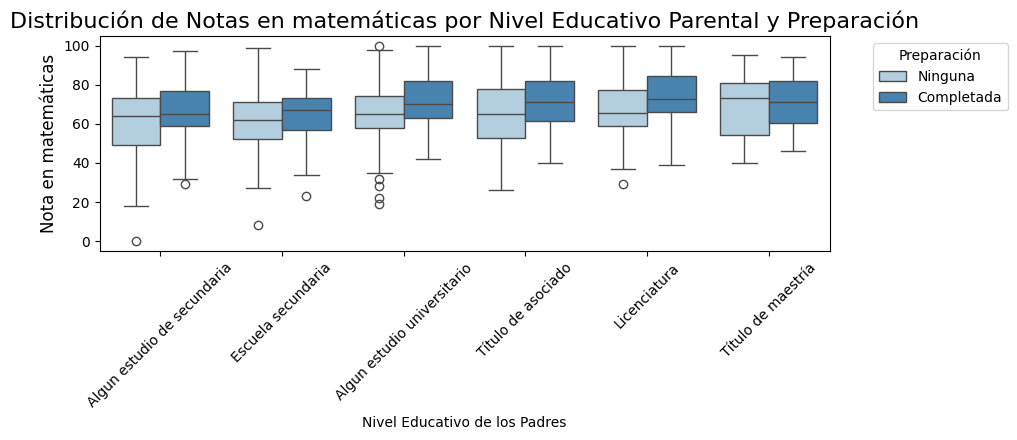

In [24]:
# Creando el grafico
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    x='Nivel educativo de los padres',
    y='Matemática',
    hue='Preparación',
    data=df,
    order=orden_jerarquico,
    palette='Blues'
)

# Añadir etiquetas y título
plt.title('Distribución de Notas en matemáticas por Nivel Educativo Parental y Preparación', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=10)
plt.ylabel('Nota en matemáticas', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout
plt.tight_layout()

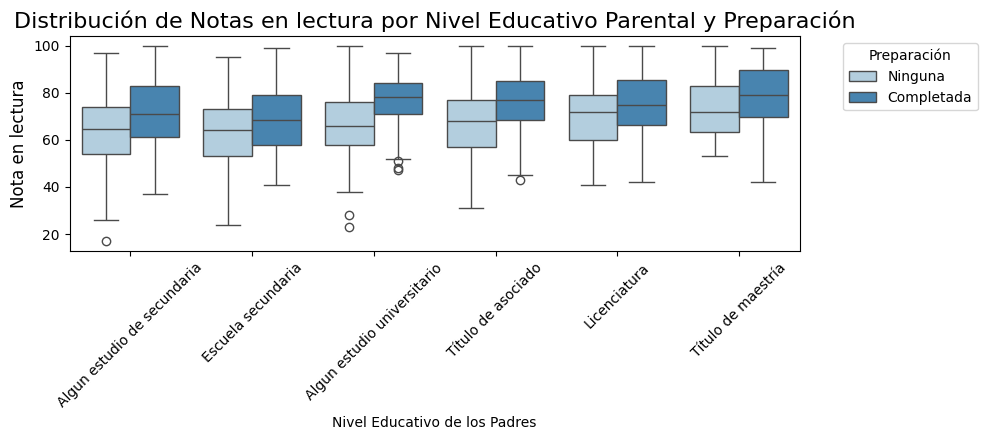

In [25]:
# Creando el grafico
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    x='Nivel educativo de los padres',
    y='Lectura',
    hue='Preparación',
    data=df,
    order=orden_jerarquico,
    palette='Blues'
)

# Añadir etiquetas y título
plt.title('Distribución de Notas en lectura por Nivel Educativo Parental y Preparación', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=10)
plt.ylabel('Nota en lectura', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout
plt.tight_layout()

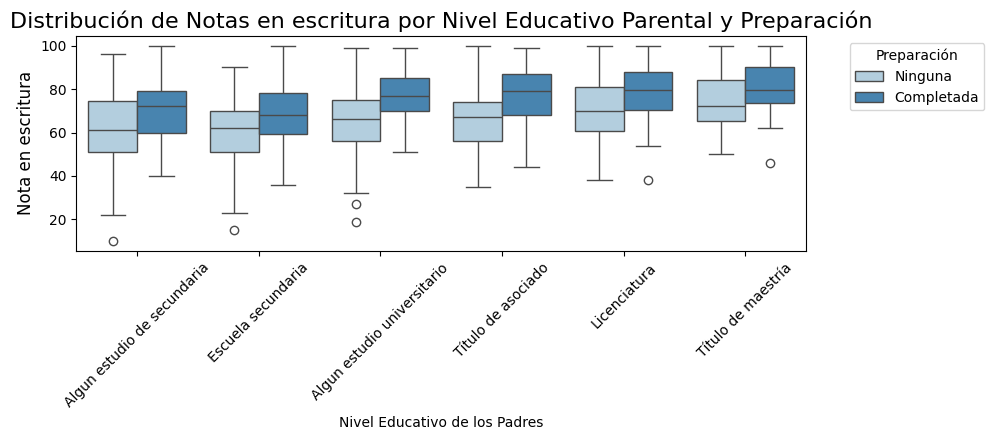

In [26]:
# Creando el grafico
plt.figure(figsize=(10, 4.5))
sns.boxplot(
    x='Nivel educativo de los padres',
    y='Escritura',
    hue='Preparación',
    data=df,
    order=orden_jerarquico,
    palette='Blues'
)

# Añadir etiquetas y título
plt.title('Distribución de Notas en escritura por Nivel Educativo Parental y Preparación', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=10)
plt.ylabel('Nota en escritura', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Preparación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout
plt.tight_layout()

# **Sexo del estudiante como influyente en la preparación previa, en estudiantes con padres de algún estudio de secundaria.**

Se seleccionan únicamente a los estudiantes con padres de "Algun estudio de secundaria", ya que, como se observó al principio del analisis, este valor en especifico de la variable "Nivel educativo de los padres" presenta un comportamiento atipico respecto a la conclusión que se quiere llegar, ya que no sigue la correlación esperada, siendo que poseen un porcentaje de mayor realización de preparación previa, cuando el estudio espera que la presenten en menor cantidad.

Para esto, se relacionará junto a la variable "sexo", y ver qué influencia podría tener sobre esta categoría en específico, lo que podria explicar el comportamiento atípico.

- Se utilizará la siguiente modificación del DataFrame original, de la cual se realizó una tabla de contingencia, para filtrar unicamente a los padres con algun estudio de secundaria:

In [27]:
# Tabla de contingencia para tipo de almuerzo y preparación
df_filtrado = df[df['Nivel educativo de los padres'] == 'Algun estudio de secundaria']

crosstab_almuerzo = pd.crosstab(df_filtrado['Género'], df_filtrado['Preparación'])

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_

crosstab_almuerzo

Preparación,Completada,Ninguna
Género,,
Femenino,35,56
Masculino,42,46


Estos se representaron de mejor manera en el siguiente gráfico de barras (se tiene en cuenta que las observaciones son de únicamente ''Algun estudio de secundaria''):

- Aquellos estudiantes de sexo masculino tienden más a completar la preparación previa que las mujeres. Esto, según la teoría desarrollada en el trabajo y fundamentada en otros proyectos de investigación, señala basicamente que los hombres tienen una ligera mejor preparación que las mujeres.

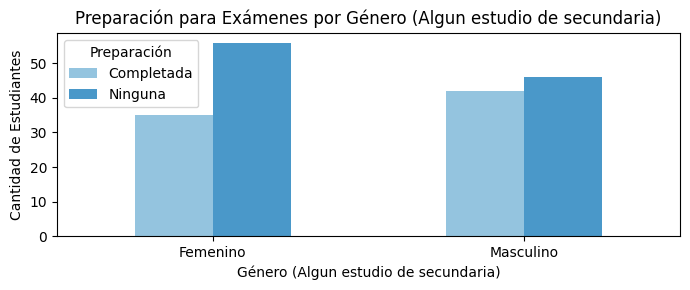

In [28]:
# Creando gráfico de barras agrupadas
crosstab_almuerzo.plot(kind='bar',
                       figsize=(7, 3),
                       color=colors)


plt.title('Preparación para Exámenes por Género (Algun estudio de secundaria)')
plt.xlabel('Género (Algun estudio de secundaria)')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.legend(title='Preparación')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# **CONCLUSIONES**

Finalmente, con los análisis descriptivos realizados de todas las variables de estudio seleccionadas, en base al planteamiento principal: 

- **ANALIZAR LA CORRELACIÓN ENTRE EL NIVEL EDUCATIVO PARENTAL Y LA PREPARACIÓN PREVIA PARA EXÁMENES EN ESTUDIANTES DE 5º Y 6º GRADO, CONSIDERANDO EL SEXO DEL ESTUDIANTE COMO FACTOR CLAVE EN ESTUDIANTES CON PADRES DE MENOR FORMACION EDUCATIVA** 

Y los objetivos específicos:  

- Distribuir las categorías de preparación para exámenes (completed/none) entre los diferentes niveles educativos parentales.

- Comparar si los estudiantes con padres de mayor nivel educativo tienen una tasa de preparación para exámenes significativamente mayor que aquellos con padres de menor formación.

- Evaluar el impacto de la preparación previa para exámenes en las notas de los estudiantes, según el nivel educativo parental.

- Analizar si el sexo del estudiante influye en la preparación para exámenes en estudiantes con padres de menor nivel educativo “Algún estudio de secundaria” (caso atípico).

Con los resultados que el estudio arrojó tanto de las tablas de contingencia como de los diferentes gráficos, podemos tener en cuenta que efectivamente, si un estudiante posee padres con una calidad educativa superior, estos tenderán más a realizar preparaciones previas académicas, lo que podría definirse como motivación intrinseca. Además, en contextos de menor formación academica parental, el sexo del estudiante podría influir en esta toma de preparación previa. Otro tipo de observaciones podrían estar influyendo en esta toma de preparación, por lo que se debería realizar un estudio más a profundidad de cómo otro tipo de factores estudiantiles podrían interferir.